<a href="https://colab.research.google.com/github/JoyNeema/Autobil-Data-Analysis/blob/main/%22Moringa_Data_Science_Prep_W4_Independent_Project_2019_06_Joy_Neema_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Autobil Data Analysis-Python Notebook

##1.0 Importing our Libraries

In [32]:
#Importing the libraries that we'll need

#Importing Pandas library
import pandas as pd

#Importing Numpy library
import numpy as np

##1.1 Reading the Dataset from a CSV File

The daset we will use contains data of cars that were rented out on specific dates and times at various regions

*   Dataset link for download or access /content/Autolib_dataset (2).csv






In [37]:
#We read the dataset from the provided CSV file and create a dataframe for analysis
#
Autolib_dataset = pd.read_csv("/content/Autolib_dataset (2).csv")
Autolib_dataset

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


##1.2 Previewing our Dataset

In [38]:
#Lets preview the first ten rows of our dataset
#
df= pd.read_csv("/content/Autolib_dataset (2).csv")
df.head(10)
print(df)

                                 Address  Cars  ...  hour  minute
0                    2 Avenue de Suffren     0  ...    11      43
1              145 Rue Raymond Losserand     6  ...     7      24
2       2 Avenue John Fitzgerald Kennedy     3  ...    20      14
3                 51 Rue EugÃ¨ne OudinÃ©     3  ...     4      37
4     6 avenue de la Porte de Champerret     3  ...    17      23
...                                  ...   ...  ...   ...     ...
4995                 8 avenue MÃ©nelotte     2  ...    11      26
4996                   37 rue de Dantzig     4  ...    16      56
4997                      142 rue du Bac     1  ...     7       1
4998         2 avenue du Val de Fontenay     2  ...    17      27
4999                 5 Rue Henry Brisson     4  ...    10       2

[5000 rows x 25 columns]


## 1.3 Accessing Information about our Dataset

In [42]:
#Getting to know more about our dataset by accessing its information
#
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          5000 non-null   object
 1   Cars             5000 non-null   int64 
 2   Bluecar counter  5000 non-null   int64 
 3   City             5000 non-null   object
 4   Postal code      5000 non-null   int64 
 5   year             5000 non-null   int64 
 6   month            5000 non-null   int64 
 7   day              5000 non-null   int64 
 8   hour             5000 non-null   int64 
 9   minute           5000 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 390.8+ KB


## 1.4 Data Cleaning

Let us perform relevant data cleaning procedures providing a documentation of the actions and reasons why

### 1.41) Validity

In [40]:
#We will drop columns that we will not need as we will only be analysing Blue Cars
#
df.drop(['Utilib counter',	'Utilib 1.4 counter',	'Charge Slots',	'Charging Status', 'Displayed comment',	'ID',	'Kind',	'Geo point',	'Public name',	'Rental status',	'Scheduled at',	'Slots',	'Station type',	'Status',	'Subscription status'	], axis = 1, inplace = True)
df.head()

,Address,Cars,Bluecar counter,City,Postal code,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,Paris,75015,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,Paris,75014,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,Le Bourget,93350,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,Paris,75013,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,Paris,75017,2018,4,8,17,23


### 1.42) Accuracy

In [12]:
#Checking for any duplicate values in our dataset
#
df.duplicated().any()
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool


###1.43) Completeness

In [11]:
#Checking for any missing values
#
df.isnull().sum()
print(df.isnull())

      Address   Cars  Bluecar counter   City  ...  month    day   hour  minute
0       False  False            False  False  ...  False  False  False   False
1       False  False            False  False  ...  False  False  False   False
2       False  False            False  False  ...  False  False  False   False
3       False  False            False  False  ...  False  False  False   False
4       False  False            False  False  ...  False  False  False   False
...       ...    ...              ...    ...  ...    ...    ...    ...     ...
4995    False  False            False  False  ...  False  False  False   False
4996    False  False            False  False  ...  False  False  False   False
4997    False  False            False  False  ...  False  False  False   False
4998    False  False            False  False  ...  False  False  False   False
4999    False  False            False  False  ...  False  False  False   False

[5000 rows x 9 columns]


##1.5 Finding Outliers

###1.51) Box Plot

In [17]:
#Lets graphically display the time and day in which the Blue car was picked
#
#Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

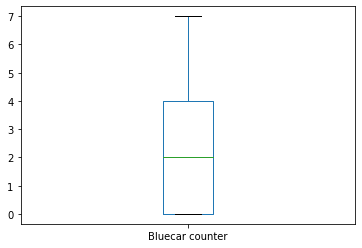

In [18]:
#Creating a box plot for the Bluecar Counter
#
df.boxplot(column =['Bluecar counter'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


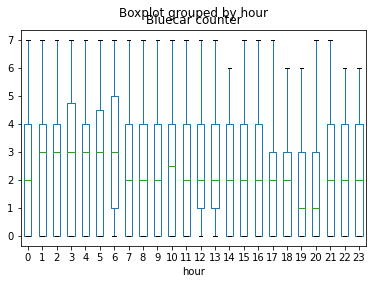

In [25]:
#Identifying the most popular hour in which the Bluecar is picked
#
df.boxplot(column =['Bluecar counter'], by ='hour' , grid = False)


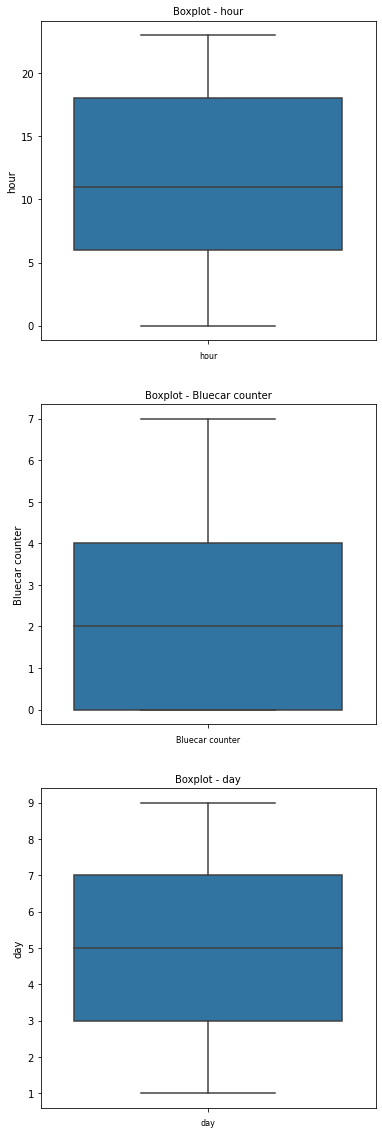

In [29]:
#Displaying the pick up day and hour for the Blue car
#
column_names = ['hour', 'Bluecar counter', 'day']
fig, ax = plt.subplots(len(column_names), figsize=(6,20))

for i, col_val in enumerate(column_names):
  sns.boxplot(y = df[col_val], ax=ax[i])
  ax[i].set_title('Boxplot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

###1.52) Bar Graph

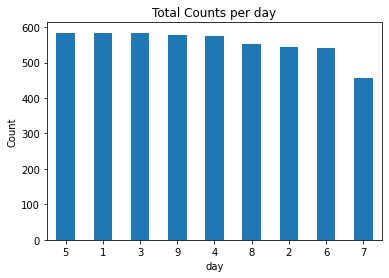

In [20]:
#Lets display the most busy days of the week 
#For better understanding, we will use a bar graph 
#
df['day'].value_counts().plot.bar(rot =0)
plt.xlabel("day")
plt.ylabel("Count")
plt.title("Total Counts per day")
plt.show()

#The most busy days were on 5th, 1st, 3rd and 9th

###1.53) Histogram

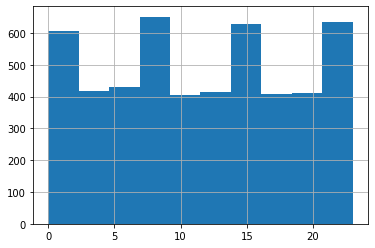

In [27]:
#Lets display the pick up hours by use of a histogram
#
df.hour.hist()

##1.6 Data Analysis

In [71]:
# Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018
# select city == Paris
df_paris = df[df['City'] =='Paris'] 
df_paris.head(1)


,Address,Cars,Bluecar counter,City,Postal code,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,Paris,75015,2018,4,8,11,43


In [41]:
#Finding the most unique postal code
#
df['Postal code'].unique()

array([75015, 75014, 93350, 75013, 75017, 75011, 92000, 75009, 75005,
       92800, 92260, 78150, 92150, 78000, 92240, 75007, 75010, 92130,
       75006, 75018, 75004, 75020, 92210, 92310, 95870, 94130, 75016,
       94000, 94800, 92500, 75012, 92390, 75003, 93100, 75019, 94220,
       92400, 92600, 92380, 75001, 93700, 92250, 91370, 93150, 75002,
       92170, 75008, 95880, 92330, 92300, 92100, 92290, 93500, 92190,
       92230, 94300, 94150, 92700, 94120, 93110, 92340, 94230, 94700,
       91570, 94140, 94500, 93600, 93200, 92350, 93310, 92140, 92220,
       92270, 78280, 93170, 92420, 94450, 94410, 93230, 78140, 94110,
       75116, 93400, 92360, 92410, 95100, 93130, 94160, 92200, 93390,
       93370, 92160, 93800, 92320, 91330, 93440, 94340, 93360, 92110,
       75112, 92120, 94370, 92370, 91400, 93260, 94100, 93300])

In [43]:
#Summary statistics 
#
df.describe()

,Cars,Bluecar counter,Postal code,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,82634.878400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,8835.865721,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,75001.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,75012.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,75019.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,92320.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,95880.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [44]:
#Lets do a random sampling of our dataset
#We select a random subset of 2 without replacement
#
df.take(np.random.permutation(len(df))[:2])

,Address,Cars,Bluecar counter,City,Postal code,year,month,day,hour,minute
678,88 avenue du GÃ©nÃ©ral de Gaulle,2,2,Issy-les-Moulineaux,92130,2018,4,2,15,42
88,10 Rue Sadi Carnot,2,2,AsniÃ¨res-sur-Seine,92600,2018,4,5,23,23


In [48]:
#Most popular hour
#
df['hour'].max

<bound method Series.max of 0       11
1        7
2       20
3        4
4       17
        ..
4995    11
4996    16
4997     7
4998    17
4999    10
Name: hour, Length: 5000, dtype: int64>